# Files (Chapter 9)

## Context manager

*with* statement in Python: context manager
- Acquires a resource and assigns its corresponding object to a variable
- Allows the application to use the resource via that variable
- Calls the resource object’s close method to release the resource

*open*:
- Built-In function *open* opens a file and associates it with a file object.
- *mode* specifies **file-open mode**: `'w'` opens for writing
- **Be careful-** opening a file for writing deletes all the existing data in the file
- By convention, the . txt file extension indicates a plain text file

In [3]:
"""Write some records to the file named accounts.txt """

with open('accounts.txt', mode= 'w' ) as accounts:
    accounts.write('100 Jones 24.98\n')
    accounts.write('200 Doe 345.67\n')
    accounts.write('300 White 0.00\n')
    accounts.write('400 Stone -42.16\n')
    accounts.write('500 Richy 224.62\n')


In [4]:
"""Verify that file is closed """

accounts.write("Is file still open?")

ValueError: I/O operation on closed file.

## Not so Pytonic way to write to a file

In [5]:
"""Manually opening and closing file"""

f = open('bad.txt', mode= 'w' )
f.write('Non-pythonic way to open a file for writing.\n')
f.write('Don\'t do it!\n')
f.write('Really.\n')
f.write('I am not kidding.\n')
f.close()

## Reading from a file: iterating over lines
- mode `'r'` is for reading
- `for` iterates over all lines in the file

In [6]:
with open('bad.txt', mode='r') as f:
    for line in f:
        print(line)

Non-pythonic way to open a file for writing.

Don't do it!

Really.

I am not kidding.



In [7]:
with open('bad.txt', mode='r') as f:
    for line in f:
        print(line, end="")

Non-pythonic way to open a file for writing.
Don't do it!
Really.
I am not kidding.


In [15]:
with open('accounts.txt', mode='r') as accounts:
    print(f'{"Account":<10}{"Name":<10}{"Balance":>10}')
    for record in accounts:
        account,name, balance = record.split()
        print(f'{account:<10}{name:<10}{balance:>10}')

Account   Name         Balance
100       Jones          24.98
200       Doe           345.67
300       White           0.00
400       Stone         -42.16
500       Richy         224.62


In [16]:
with open('no_such_file.txt', mode='r') as f:
    for line in f:
        print(line, end="")

FileNotFoundError: [Errno 2] No such file or directory: 'no_such_file.txt'

## More ways to read a file

### Reading a file into a string: read

In [17]:
"""Enumerate all words in a text together with their position"""

with open('bad.txt', mode='r') as f:
    whole_file = f.read() #returns one string
    
for nr,word in enumerate(whole_file.split()):
    print(f"word {nr+1} is {word}")

word 1 is Non-pythonic
word 2 is way
word 3 is to
word 4 is open
word 5 is a
word 6 is file
word 7 is for
word 8 is writing.
word 9 is Don't
word 10 is do
word 11 is it!
word 12 is Really.
word 13 is I
word 14 is am
word 15 is not
word 16 is kidding.


### Reading a file into a list: readlines

In [18]:
"""Counting the number of lines in a file"""

with open('bad.txt', mode='r') as f:
    my_list = f.readlines() #returns a list
    
print(f"bad.txt contains {len(my_list)} lines")

bad.txt contains 4 lines


See [https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files](https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files)

In [20]:
"""Sorting the lines in a file"""

with open('bad.txt', mode='r') as f, \
     open('bad_sorted.txt', mode='w') as f_sorted:
    my_list = f.readlines()
    my_list.sort()
    f_sorted.writelines(my_list)


## Navigating in a file: seek

seek(i): move file pointer to position `i` 

In [21]:
"""Simple example of the seek function"""

with open('accounts.txt', 'r') as accounts:
    for record in accounts:
        print(record, end="")
    print("----")
    accounts.seek(0)
    for record in accounts:
        print(record, end="")
    print("----")
    accounts.seek(16)
    for record in accounts:
        print(record, end="")


100 Jones 24.98
200 Doe 345.67
300 White 0.00
400 Stone -42.16
500 Richy 224.62
----
100 Jones 24.98
200 Doe 345.67
300 White 0.00
400 Stone -42.16
500 Richy 224.62
----

200 Doe 345.67
300 White 0.00
400 Stone -42.16
500 Richy 224.62


## Updating a file 

Advise: don't update a file itself.  
Instead, create a new temporary file with the correct content and then rename it

In [ ]:
"""Replacing the name of record 300 (White) by williams
   and writing to a temporary file"""

with open('accounts.txt', 'r') as accounts, \
    open('temp_file.txt', 'w') as temp_file:
    for record in accounts:
        account, name, balance = record.split()
        if account != '300':
            temp_file.write(record)
        else:
            new_record = ' '.join([account, 'Williams', balance])
            temp_file.write(new_record + '\n')

In [22]:
""" """

import os
os.remove("accounts.txt")
os.rename("temp_file.txt","accounts.txt")

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'temp_file.txt' -> 'accounts.txt'

See [https://docs.python.org/3/library/os.html](https://docs.python.org/3/library/os.html) for more information on the `os` module.

# Serialization with JSON

- Serialization is the process of translating a data structure or object into a format that can be stored or transmitted (for example, across a computer network) and reconstructed later (possibly in a different computer environment)
- JSON (JavaScript Object Notation) is a text-based, human-and-computer-readable, data-interchange format used to represent objects as collections of name–value pairs. 
- Preferred data format for transmitting objects across platforms.

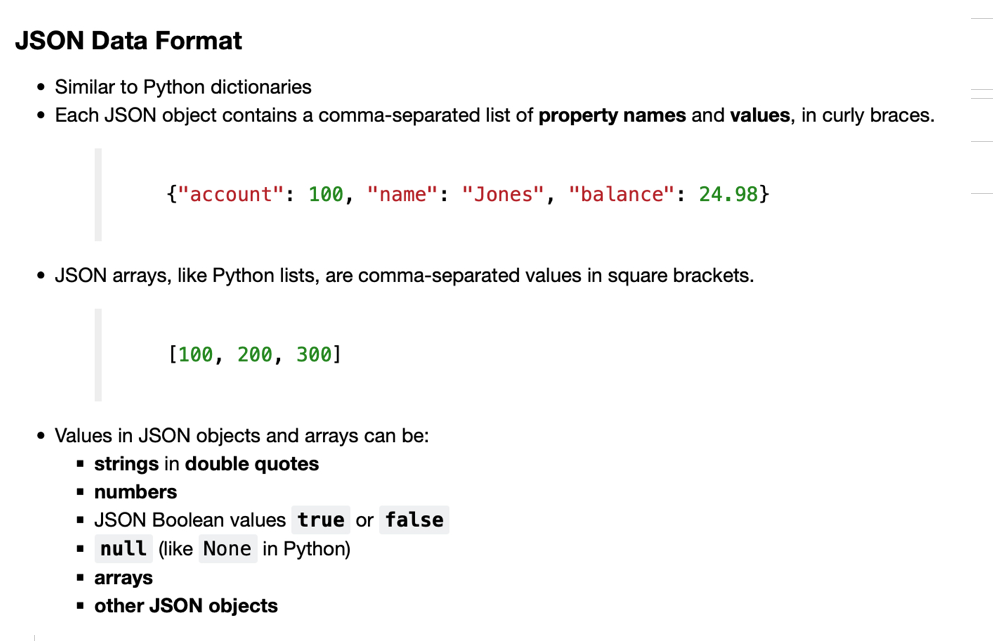

In [23]:
"""Write a dictionary to a JSON file"""

import json

accounts_dict = {'accounts': [
    {'account': 100, 'name': 'Jones', 'balance': 24.98},
    {'account': 200, 'name': 'Doe', 'balance': 345.67}]}

# write json
with open('accounts.json', 'w') as accounts:
    json.dump(accounts_dict, accounts)


In [25]:
"""Read JSON file into a dictionary"""

with open('accounts.json', 'r') as accounts:
    accounts_json = json.load(accounts)

Acccessing the dictionary:

In [26]:
accounts_json

{'accounts': [{'account': 100, 'name': 'Jones', 'balance': 24.98},
  {'account': 200, 'name': 'Doe', 'balance': 345.67}]}

In [27]:
accounts_json['accounts']

[{'account': 100, 'name': 'Jones', 'balance': 24.98},
 {'account': 200, 'name': 'Doe', 'balance': 345.67}]

In [28]:
accounts_json['accounts'][0]

{'account': 100, 'name': 'Jones', 'balance': 24.98}

In [29]:
accounts_json['accounts'][0]['name']

'Jones'

In [30]:
"""Pretty print a JSON file"""

with open('accounts.json', 'r') as accounts:
    print(json.dumps(json.load(accounts), indent=4))

{
    "accounts": [
        {
            "account": 100,
            "name": "Jones",
            "balance": 24.98
        },
        {
            "account": 200,
            "name": "Doe",
            "balance": 345.67
        }
    ]
}


See [https://docs.python.org/3/library/json.html](https://docs.python.org/3/library/json.html) for more information on the `json` module